# We're gonna use pandas to make a hydrograph and a duration curve with water-level data from a .csv file

As usual, the first block of code is to import all the python modules we need. Pandas is the module we are going to use to manipulate the data and make graphs (pandas will use the matplotlib tool to generate the graphs). We also need python's csv module so we can read our csv file.

In [1]:
import sys
import os

import numpy as np
import pandas as pd

import csv
import datetime

import matplotlib.pyplot as plt

Now we want to open a csv file, which we can do with pandas. Pandas will show us the data in a table.

If you are getting a Parses error when you try to open the csv file, like "expecting 2 fields, saw 4", it's probably because the first few rows are just information and not actual data. Pandas expects the number of fields (columns) that the first row has. You need to skip those first few rows with the skiprows=x command so the script will expect the right number of columns. In the Water Data Online csv files, the first few lines are explanatory and only have 2 columns but the rest of the data is 4 columns.  You can open the csv file with gedit to see how many lines you need to skip. You can also say error_bad_lines = False to skip any lines with the wrong number of columns that come after that.

In [84]:
# Read the csv file with pandas
# Have a look at the csv file on a text editor to see how many rows at the start you need to skip.
# We're gonna make this as a function so we can call it. We'll call it df (dataframe) because that's standard practice.
df = pd.read_csv('/g/data/r78/kd6095/dea-notebooks/Tantangara/Tantangara_water_level.csv', 
                 error_bad_lines = False, skiprows=9)

In Pandas, if you use the .keys() function it tells you what columns you have

In [3]:
df.keys()

Index(['#Timestamp', 'Value', 'Interpolation Type', 'Quality Code'], dtype='object')

OK, so we don't need the Interpolation Type or Quality Code columns so we can .drop them and redefine the df function each time. Let's also .rename the Value and #Timestamp columns. .drop and .rename are pandas commands by the way

In [4]:
df = df.drop(columns='Interpolation Type')

In [5]:
df = df.drop(columns='Quality Code')

In [6]:
df = df.rename(columns={'#Timestamp': 'Timestamp'})

In [7]:
df = df.rename(columns={'Value': 'Level_above_sealevel'})

Alright, let's hava a look at our data now. All you have to do to .read_csv is call the name of the function we made:

In [8]:
df

,Timestamp,Level_above_sealevel
0,1992-10-08T00:00:00.000+10:00,1227.920
1,1992-10-09T00:00:00.000+10:00,1228.012
2,1992-10-10T00:00:00.000+10:00,1228.225
3,1992-10-11T00:00:00.000+10:00,1228.404
4,1992-10-12T00:00:00.000+10:00,1228.543
5,1992-10-13T00:00:00.000+10:00,1228.630
6,1992-10-14T00:00:00.000+10:00,1228.683
7,1992-10-15T00:00:00.000+10:00,1228.721
8,1992-10-16T00:00:00.000+10:00,1228.755
9,1992-10-17T00:00:00.000+10:00,1228.789


OK nice, you looked at your csv file with pandas. Now we can make it into a graph, also using pandas (pandas will automatically use the matplotlib module to generate the graph). So we'll use the df function we made to call the csv data with pandas and we'll plot it with the pandas .plot function. Specify what you want on each axis. In Pandas you can also make changes to how the graph looks using the inbuilt commands such as"figsize" or "color" (American spelling). 15 and 5 are good parameters for figsize.

# OK, let's .plot this baby!

In [85]:
df.plot(x='Timestamp', y='Level_above_sealevel', figsize=(15,5))

KeyError: 'Timestamp'

You'll notice there's some missing data before 1999. We want to get rid of rows where the 'Value' column doesn't have data in it. We can use the .dropna function to tell it to do that. Notice that every time we want to change something about the data, we have to redefine the df variable. 

In [10]:
df = df.dropna()

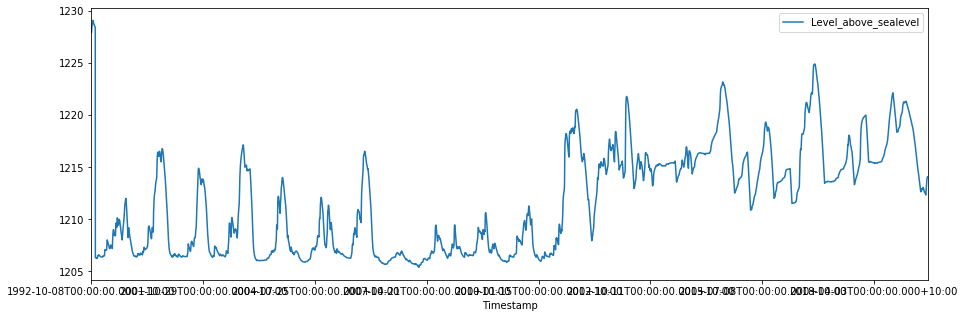

In [11]:
df.plot(x='Timestamp', figsize=(15,5))

Wow, cool! Nice hydrograph dude

Will we try making a duration curve now ?!!

# Turn this hydrograph into a water-level duration curve!

We can use some other pandas functions to rearrange the data. For a duration curve, time (as in date) isn't one of the axis, we need to create a new axis called exceedence that is '% of time the water was at least at this level'. The formula for that is 1-(rank/total data points)*100.

First we need to sort the data by water level, lowest to highest. If you wanted to arrange it from highest to lowest you would have to add the argument ascending=False. But default is to arrange lowest to highest, which is what we want. 

In [19]:
df = df.sort_values('Level_above_sealevel')

In [40]:
df

,Timestamp,Level_above_sealevel
5237,2007-02-09T00:00:00.000+10:00,1205.383
5238,2007-02-10T00:00:00.000+10:00,1205.394
5236,2007-02-08T00:00:00.000+10:00,1205.402
5235,2007-02-07T00:00:00.000+10:00,1205.421
5234,2007-02-06T00:00:00.000+10:00,1205.433
5233,2007-02-05T00:00:00.000+10:00,1205.441
5232,2007-02-04T00:00:00.000+10:00,1205.447
5231,2007-02-03T00:00:00.000+10:00,1205.462
5230,2007-02-02T00:00:00.000+10:00,1205.475
5229,2007-02-01T00:00:00.000+10:00,1205.489


OK, great now let's get the total number of data points, one of the elements we need to make the exceedence column.

In [47]:
totalrows = len(df)

In [67]:
totalrows

7489

Piece of cake. We also have to make a column called rownumbers that numbers the rows so that 0 is the lowest water level ever and 7489 is the highest water level ever. Let's just quickly use a little bit of numpy(np) to do this with the numpy .arange command:

In [63]:
df['rownumber'] = np.arange(totalrows)

In [79]:
df.keys()

Index(['Timestamp', 'Level_above_sealevel', 'rownumber', 'Exceedence'], dtype='object')

OK, great it's been rearranged, we used the len command (as in length) to see how many rows we have and we used numpy to make a new column to create the row numbers. That was easy! Now we need to make a new column called exceedence that has the formula 1-(rownumber/totalrows).

To make a new column in pandas use df['new column name'] =  and then refer to the columns using df.columnname (not 'columnname') and use maths tools like *  /  +  or - and brackets and numbers. Don't use strings, they don't work with this. 

In [77]:
df['Exceedence'] = (1-(df.rownumber/totalrows))*100

Cool, now you can do math with the data! Nice. 

Now the moment we've all been waiting for! Let's .plot that water-level duration curve!!!

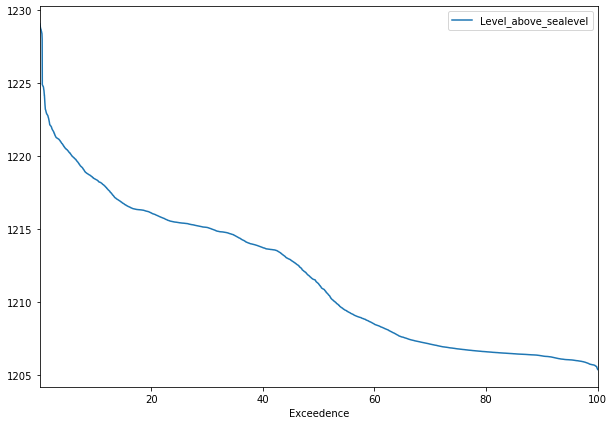

In [82]:
df.plot(x='Exceedence', y='Level_above_sealevel', figsize=(10,7))

Omg, yay well done you did it! Good job. 